In [1]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import Binarizer

import pandas as pd

In [4]:
X = pd.read_csv("train.csv")
y = X.pop("Survived")

test = pd.read_csv("test.csv")

In [5]:
X.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [7]:
X["Age"].fillna(X["Age"].mean(), inplace=True)
X.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.836071,13.002015,1.102743,0.806057,49.693429
min,1.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,668.500000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [8]:
test["Age"].fillna(test["Age"].mean(), inplace=True)
test.describe()


,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,12.634534,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,23.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,30.272590,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,35.750000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [9]:
test["Fare"].fillna(test["Fare"].mean(), inplace=True)
test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,12.634534,0.896760,0.981429,55.840500
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,23.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,30.272590,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,35.750000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [10]:
numeric_variables = list(X.dtypes[X.dtypes != "object"].index)
X[numeric_variables].head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
0,1,3,22.0,1,0,7.2500
1,2,1,38.0,1,0,71.2833
2,3,3,26.0,0,0,7.9250
3,4,1,35.0,1,0,53.1000
4,5,3,35.0,0,0,8.0500


In [11]:
from sklearn.preprocessing import StandardScaler

scaled_X = StandardScaler().fit(X[numeric_variables]).transform(X[numeric_variables])

# Train Model

In [12]:
model = RandomForestRegressor(n_estimators=100, oob_score=True, random_state=42)
#model.fit(X[numeric_variables], y)
model.fit(scaled_X, y)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
           oob_score=True, random_state=42, verbose=0, warm_start=False)

In [13]:
model.oob_score_

# w/o scaler = 0.1361695005913669
# w scaler = 0.13681410597870625

0.13681410597870625

In [14]:
y_oob = model.oob_prediction_
print("c_stat: ", roc_auc_score(y, y_oob))

# w/o scaler c_stat:  0.73995515504
# w scaler c_stat:  0.740210803268

c_stat:  0.740210803268


# Categorical Data

In [15]:
def describe_categorical(X):
    from IPython.display import display, HTML
    display(HTML(X[X.columns[X.dtypes == "object"]].describe().to_html()))

In [16]:
describe_categorical(X)


,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Kassem, Mr. Fared",male,1601,B96 B98,S
freq,1,577,7,4,644


In [17]:
describe_categorical(test)


,Name,Sex,Ticket,Cabin,Embarked
count,418,418,418,91,418
unique,418,2,363,76,3
top,"Mangiavacchi, Mr. Serafino Emilio",male,PC 17608,B57 B59 B63 B66,S
freq,1,266,5,3,270


In [18]:
X.drop(["Name", "Ticket", "PassengerId"], axis=1, inplace=True)
test.drop(["Name", "Ticket"], axis=1, inplace=True)
id = test.pop("PassengerId")

In [19]:
def clean_cabin(x):
    try:
        return x[0]
    except TypeError:
        return "None"
    
X["Cabin"] = X.Cabin.apply(clean_cabin)
test["Cabin"] = test.Cabin.apply(clean_cabin)

In [20]:
X.Cabin


0      None
1         C
2      None
3         C
4      None
5      None
6         E
7      None
8      None
9      None
10        G
11        C
12     None
13     None
14     None
15     None
16     None
17     None
18     None
19     None
20     None
21        D
22     None
23        A
24     None
25     None
26     None
27        C
28     None
29     None
       ... 
861    None
862       D
863    None
864    None
865    None
866    None
867       A
868    None
869    None
870    None
871       D
872       B
873    None
874    None
875    None
876    None
877    None
878    None
879       C
880    None
881    None
882    None
883    None
884    None
885    None
886    None
887       B
888    None
889       C
890    None
Name: Cabin, Length: 891, dtype: object

In [21]:
test.Cabin

0      None
1      None
2      None
3      None
4      None
5      None
6      None
7      None
8      None
9      None
10     None
11     None
12        B
13     None
14        E
15     None
16     None
17     None
18     None
19     None
20     None
21     None
22     None
23     None
24        B
25     None
26        B
27     None
28        A
29     None
       ... 
388    None
389    None
390       B
391       D
392    None
393    None
394    None
395       C
396    None
397       B
398    None
399    None
400       C
401    None
402    None
403    None
404       D
405       D
406    None
407       C
408    None
409    None
410    None
411       C
412    None
413    None
414       C
415    None
416    None
417    None
Name: Cabin, Length: 418, dtype: object

In [22]:
categorical_variables = ["Sex", "Cabin", "Embarked"]

for variable in categorical_variables:
    X[variable].fillna("Missing", inplace=True)
    dummies = pd.get_dummies(X[variable], prefix=variable)
    X = pd.concat([X, dummies], axis=1)
    X.drop([variable], axis=1, inplace=True)

In [23]:
X


,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Cabin_A,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_None,Cabin_T,Embarked_C,Embarked_Missing,Embarked_Q,Embarked_S
0,3,22.000000,1,0,7.2500,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1
1,1,38.000000,1,0,71.2833,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0
2,3,26.000000,0,0,7.9250,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1
3,1,35.000000,1,0,53.1000,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1
4,3,35.000000,0,0,8.0500,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1
5,3,29.699118,0,0,8.4583,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
6,1,54.000000,0,0,51.8625,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1
7,3,2.000000,3,1,21.0750,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1
8,3,27.000000,0,2,11.1333,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1
9,2,14.000000,1,0,30.0708,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0


In [24]:
def printall(X, max_rows=10):
    from IPython.display import display, HTML
    display(HTML(X.to_html(max_rows=max_rows)))
    
printall(X)

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Cabin_A,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_None,Cabin_T,Embarked_C,Embarked_Missing,Embarked_Q,Embarked_S
0,3,22.000000,1,0,7.2500,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1
1,1,38.000000,1,0,71.2833,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0
2,3,26.000000,0,0,7.9250,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1
3,1,35.000000,1,0,53.1000,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1
4,3,35.000000,0,0,8.0500,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,2,27.000000,0,0,13.0000,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1
887,1,19.000000,0,0,30.0000,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1
888,3,29.699118,1,2,23.4500,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1
889,1,26.000000,0,0,30.0000,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0


In [25]:
for variable in categorical_variables:
    test[variable].fillna("Missing", inplace=True)
    dummies = pd.get_dummies(test[variable], prefix=variable)
    test = pd.concat([test, dummies], axis=1)
    test.drop([variable], axis=1, inplace=True)

In [26]:
test

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Cabin_A,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_None,Embarked_C,Embarked_Q,Embarked_S
0,3,34.50000,0,0,7.8292,0,1,0,0,0,0,0,0,0,1,0,1,0
1,3,47.00000,1,0,7.0000,1,0,0,0,0,0,0,0,0,1,0,0,1
2,2,62.00000,0,0,9.6875,0,1,0,0,0,0,0,0,0,1,0,1,0
3,3,27.00000,0,0,8.6625,0,1,0,0,0,0,0,0,0,1,0,0,1
4,3,22.00000,1,1,12.2875,1,0,0,0,0,0,0,0,0,1,0,0,1
5,3,14.00000,0,0,9.2250,0,1,0,0,0,0,0,0,0,1,0,0,1
6,3,30.00000,0,0,7.6292,1,0,0,0,0,0,0,0,0,1,0,1,0
7,2,26.00000,1,1,29.0000,0,1,0,0,0,0,0,0,0,1,0,0,1
8,3,18.00000,0,0,7.2292,1,0,0,0,0,0,0,0,0,1,1,0,0
9,3,21.00000,2,0,24.1500,0,1,0,0,0,0,0,0,0,1,0,0,1


In [27]:
X.describe()

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Cabin_A,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_None,Cabin_T,Embarked_C,Embarked_Missing,Embarked_Q,Embarked_S
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,2.308642,29.699118,0.523008,0.381594,32.204208,0.352413,0.647587,0.016835,0.052750,0.066218,0.037037,0.035915,0.014590,0.004489,0.771044,0.001122,0.188552,0.002245,0.086420,0.722783
std,0.836071,13.002015,1.102743,0.806057,49.693429,0.477990,0.477990,0.128725,0.223659,0.248802,0.188959,0.186182,0.119973,0.066890,0.420397,0.033501,0.391372,0.047351,0.281141,0.447876
min,1.000000,0.420000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,22.000000,0.000000,0.000000,7.910400,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.000000,29.699118,0.000000,0.000000,14.454200,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,3.000000,35.000000,1.000000,0.000000,31.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,3.000000,80.000000,8.000000,6.000000,512.329200,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [28]:
test.describe()

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Cabin_A,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_None,Embarked_C,Embarked_Q,Embarked_S
count,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000
mean,2.265550,30.272590,0.447368,0.392344,35.627188,0.363636,0.636364,0.016746,0.043062,0.083732,0.031100,0.021531,0.019139,0.002392,0.782297,0.244019,0.110048,0.645933
std,0.841838,12.634534,0.896760,0.981429,55.840500,0.481622,0.481622,0.128474,0.203240,0.277317,0.173797,0.145320,0.137177,0.048912,0.413179,0.430019,0.313324,0.478803
min,1.000000,0.170000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,23.000000,0.000000,0.000000,7.895800,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
50%,3.000000,30.272590,0.000000,0.000000,14.454200,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000
75%,3.000000,35.750000,1.000000,0.000000,31.500000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000
max,3.000000,76.000000,8.000000,9.000000,512.329200,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [30]:
all_cols = X.columns.union(test.columns)

X = X.assign(**{col:0 for col in all_cols.difference(X.columns).tolist()})
test = test.assign(**{col:0 for col in all_cols.difference(test.columns).tolist()})

In [31]:
X.columns


Index(['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Sex_female', 'Sex_male',
       'Cabin_A', 'Cabin_B', 'Cabin_C', 'Cabin_D', 'Cabin_E', 'Cabin_F',
       'Cabin_G', 'Cabin_None', 'Cabin_T', 'Embarked_C', 'Embarked_Missing',
       'Embarked_Q', 'Embarked_S'],
      dtype='object')

In [32]:
test.columns


Index(['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Sex_female', 'Sex_male',
       'Cabin_A', 'Cabin_B', 'Cabin_C', 'Cabin_D', 'Cabin_E', 'Cabin_F',
       'Cabin_G', 'Cabin_None', 'Embarked_C', 'Embarked_Q', 'Embarked_S',
       'Cabin_T', 'Embarked_Missing'],
      dtype='object')

In [35]:
scaled_X = StandardScaler().fit(X).transform(X)


In [36]:
model = RandomForestRegressor(n_estimators=100, oob_score=True, n_jobs=-1, random_state=42)
#model.fit(X, y)
model.fit(scaled_X, y)
print("c_stat: ", roc_auc_score(y, model.oob_prediction_))

# w/o scaler c_stat:  0.863521128261
# w/ scaler c_stat:  0.86386731857


c_stat:  0.86386731857


# Variable Importance Measures

In [37]:
# gives an array of the features in numerical form giving their order of importance
# hard to follow
model.feature_importances_

array([  9.11384671e-02,   2.38891052e-01,   4.43567267e-02,
         2.15831071e-02,   2.15047796e-01,   1.43423437e-01,
         1.58822440e-01,   2.95342368e-03,   3.79055011e-03,
         6.47116172e-03,   4.30998991e-03,   8.59480266e-03,
         1.02403226e-03,   8.12054428e-04,   2.67741854e-02,
         6.64265010e-05,   1.06189189e-02,   0.00000000e+00,
         6.00379221e-03,   1.53176370e-02])

In [38]:
#import matplotlib.pyplot as plt
%matplotlib inline

Pclass              0.091138
Age                 0.238891
SibSp               0.044357
Parch               0.021583
Fare                0.215048
Sex_female          0.143423
Sex_male            0.158822
Cabin_A             0.002953
Cabin_B             0.003791
Cabin_C             0.006471
Cabin_D             0.004310
Cabin_E             0.008595
Cabin_F             0.001024
Cabin_G             0.000812
Cabin_None          0.026774
Cabin_T             0.000066
Embarked_C          0.010619
Embarked_Missing    0.000000
Embarked_Q          0.006004
Embarked_S          0.015318
dtype: float64


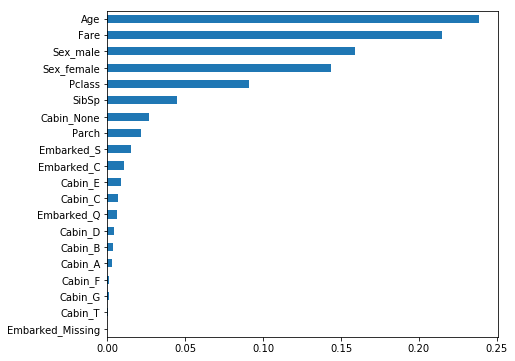

In [39]:
#from ipykernel import kernelapp as app

feature_importances = pd.Series(model.feature_importances_, index=X.columns)
print(feature_importances)
feature_importances.sort_values(inplace=True)
feature_importances.plot(kind='barh', figsize=(7,6))

Parch       0.021583
Embarked    0.031940
SibSp       0.044357
Cabin       0.054797
Pclass      0.091138
Fare        0.215048
Age         0.238891
Sex         0.302246
dtype: float64


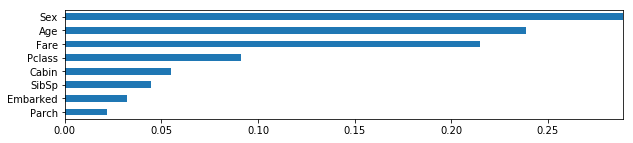

In [40]:
def graph_feature_importances(model, feature_names, autoscale=True, headroom=0.05, width=10, summarized_columns=None):
    if autoscale:
        x_scale = model.feature_importances_.max() + headroom
    else:
        x_scale = 1
        
    feature_dict=dict(zip(feature_names, model.feature_importances_))
    
    if summarized_columns:
        for col_name in summarized_columns:
            sum_value = sum(x for i, x in feature_dict.items() if col_name in i )
            keys_to_remove = [i for i in feature_dict.keys() if col_name in i ]
            for i in keys_to_remove:
                feature_dict.pop(i)
            feature_dict[col_name] = sum_value
    results = pd.Series(feature_dict, index=feature_dict.keys())
    results.sort_values(inplace=True)
    print(results)
    results.plot(kind='barh', figsize=(width, len(results)/4), xlim=(0, x_scale))
    
graph_feature_importances(model, X.columns, summarized_columns=categorical_variables)

# Parameter Optimization

In [41]:
X

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Cabin_A,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_None,Cabin_T,Embarked_C,Embarked_Missing,Embarked_Q,Embarked_S
0,3,22.000000,1,0,7.2500,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1
1,1,38.000000,1,0,71.2833,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0
2,3,26.000000,0,0,7.9250,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1
3,1,35.000000,1,0,53.1000,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1
4,3,35.000000,0,0,8.0500,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1
5,3,29.699118,0,0,8.4583,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
6,1,54.000000,0,0,51.8625,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1
7,3,2.000000,3,1,21.0750,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1
8,3,27.000000,0,2,11.1333,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1
9,2,14.000000,1,0,30.0708,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0


# n_jobs

In [42]:
%%timeit
model = RandomForestRegressor(1000, oob_score=True, n_jobs=1, random_state=42)
#model.fit(X, y)
model.fit(scaled_X, y)

# w/o scaler 1 loop, best of 3: 3.78 s per loop
# w/ scaler 1 loop, best of 3: 3.74 s per loop
# 1 loop, best of 3: 3.71 s per loop

1.75 s ± 20.4 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [43]:
%%timeit
model = RandomForestRegressor(1000, oob_score=True, n_jobs=-1, random_state=42)
#model.fit(X, y)
model.fit(scaled_X, y)

# w/o scaler 1 loop, best of 3: 2.68 s per loop
# w/ scaler 1 loop, best of 3: 2.67 s per loop
# 1 loop, best of 3: 2.78 s per loop

1.61 s ± 113 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


# n_estimators

30 trees
C-stat:  0.854597407301
 
50 trees
C-stat:  0.861377411349
 
100 trees
C-stat:  0.86386731857
 
200 trees
C-stat:  0.862541143387
 
500 trees
C-stat:  0.864168237838
 
1000 trees
C-stat:  0.864253453914
 
2000 trees
C-stat:  0.863571725306
 


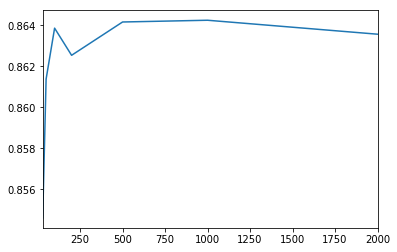

In [44]:
results = []
n_estimator_options = [30, 50, 100, 200, 500, 1000, 2000]

for trees in n_estimator_options:
    model = RandomForestRegressor(trees, oob_score=True, n_jobs=-1, random_state=42)
    #model.fit(X, y)
    model.fit(scaled_X, y)
    print(trees, 'trees')
    roc = roc_auc_score(y, model.oob_prediction_)
    print('C-stat: ', roc)
    results.append(roc)
    print (" ")
    
pd.Series(results, n_estimator_options).plot()

# max_features

auto option
C-stat:  0.864253453914
 
None option
C-stat:  0.864253453914
 
sqrt option
C-stat:  0.86368889741
 
log2 option
C-stat:  0.86368889741
 
0.9 option
C-stat:  0.863683571406
 
0.2 option
C-stat:  0.86368889741
 


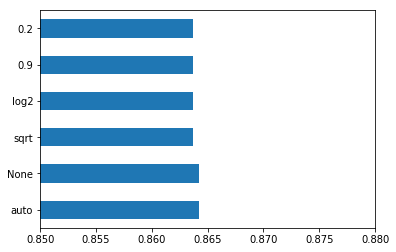

In [45]:
results = []
max_features_options = ["auto", None, "sqrt", "log2", 0.9, 0.2]

for max_features in max_features_options:
    model = RandomForestRegressor(n_estimators=1000, oob_score=True, n_jobs=-1, random_state=42, max_features=max_features)
    #model.fit(X, y)
    model.fit(scaled_X, y)
    print(max_features, "option")
    roc = roc_auc_score(y, model.oob_prediction_)
    print('C-stat: ', roc)
    results.append(roc)
    print (" ")
    
pd.Series(results, max_features_options).plot(kind='barh', xlim=(.85, .88))

# min_samples_leaf

1 min samples
C-stat:  0.864253453914
 
2 min samples
C-stat:  0.869563480651
 
3 min samples
C-stat:  0.871475516356
 
4 min samples
C-stat:  0.873403530076
 
5 min samples
C-stat:  0.874380851948
 
6 min samples
C-stat:  0.874082595682
 
7 min samples
C-stat:  0.873310324993
 
8 min samples
C-stat:  0.871925563758
 
9 min samples
C-stat:  0.869299843415
 
10 min samples
C-stat:  0.867441067757
 


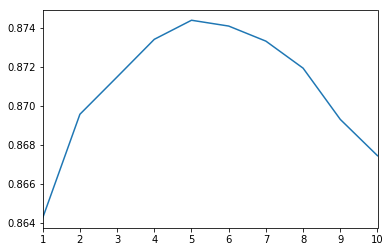

In [46]:
results = []
min_samples_leaf_options = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

for min_samples in min_samples_leaf_options:
    model = RandomForestRegressor(n_estimators=1000, oob_score=True, n_jobs=-1, random_state=42, max_features="auto", min_samples_leaf=min_samples)
    #model.fit(X, y)
    model.fit(scaled_X, y)
    print(min_samples, "min samples")
    roc = roc_auc_score(y, model.oob_prediction_)
    print('C-stat: ', roc)
    results.append(roc)
    print (" ")
    
pd.Series(results, min_samples_leaf_options).plot()

# Final Model

In [47]:
model = RandomForestRegressor(n_estimators=1000, 
                              oob_score=True, 
                              n_jobs=-1, 
                              random_state=42, 
                              max_features="auto", 
                              min_samples_leaf=5)
#model.fit(X, y)
model.fit(scaled_X, y)
roc = roc_auc_score(y, model.oob_prediction_)
print('C-stat: ', roc)

# w/o scaler C-stat:  0.874269005848
# w/ scaler C-stat:  0.874380851948

C-stat:  0.874380851948


# Test Data

Sample train data

In [48]:
test_X = scaled_X[:10]

In [49]:
test_X

array([[ 0.82737724, -0.5924806 ,  0.43279337, -0.47367361, -0.50244517,
        -0.73769513,  0.73769513, -0.13085598, -0.23598136, -0.26629582,
        -0.19611614, -0.19300938, -0.12168146, -0.06715343,  0.54492498,
        -0.03352008, -0.48204268, -0.0474312 , -0.30756234,  0.61930636],
       [-1.56610693,  0.63878901,  0.43279337, -0.47367361,  0.78684529,
         1.35557354, -1.35557354, -0.13085598, -0.23598136,  3.75522235,
        -0.19611614, -0.19300938, -0.12168146, -0.06715343, -1.835115  ,
        -0.03352008,  2.0745051 , -0.0474312 , -0.30756234, -1.61470971],
       [ 0.82737724, -0.2846632 , -0.4745452 , -0.47367361, -0.48885426,
         1.35557354, -1.35557354, -0.13085598, -0.23598136, -0.26629582,
        -0.19611614, -0.19300938, -0.12168146, -0.06715343,  0.54492498,
        -0.03352008, -0.48204268, -0.0474312 , -0.30756234,  0.61930636],
       [-1.56610693,  0.40792596,  0.43279337, -0.47367361,  0.42073024,
         1.35557354, -1.35557354, -0.13085598, -

In [50]:
pred = model.predict(test_X)

In [51]:
print(pred)

[ 0.05643663  0.9749125   0.48979059  0.97599377  0.03940262  0.19130862
  0.18944378  0.32100535  0.67505152  0.98436891]


In [60]:
binary_pred = Binarizer(threshold=0.55).fit(pred).transform(pred)
print(binary_pred)

ValueError: Expected 2D array, got 1D array instead:
array=[ 0.05643663  0.9749125   0.48979059  0.97599377  0.03940262  0.19130862
  0.18944378  0.32100535  0.67505152  0.98436891].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

# Predictions

In [53]:
scaled_test = StandardScaler().fit(test).transform(test)

In [54]:
scaled_test[:10]

array([[ 0.87348191,  0.3349926 , -0.49947002, -0.4002477 , -0.49840706,
        -0.75592895,  0.75592895, -0.13050529, -0.21213203, -0.30229756,
        -0.17916128, -0.14834045, -0.13968606, -0.04897021,  0.52752958,
        -0.56814154,  2.84375747, -1.35067551,  0.        ,  0.        ],
       [ 0.87348191,  1.32553003,  0.61699237, -0.4002477 , -0.51327429,
         1.32287566, -1.32287566, -0.13050529, -0.21213203, -0.30229756,
        -0.17916128, -0.14834045, -0.13968606, -0.04897021,  0.52752958,
        -0.56814154, -0.35164743,  0.74037028,  0.        ,  0.        ],
       [-0.31581919,  2.51417495, -0.49947002, -0.4002477 , -0.46508846,
        -0.75592895,  0.75592895, -0.13050529, -0.21213203, -0.30229756,
        -0.17916128, -0.14834045, -0.13968606, -0.04897021,  0.52752958,
        -0.56814154,  2.84375747, -1.35067551,  0.        ,  0.        ],
       [ 0.87348191, -0.25932986, -0.49947002, -0.4002477 , -0.48346631,
        -0.75592895,  0.75592895, -0.13050529, -

In [55]:
prediction = model.predict(scaled_test)

In [56]:
print(prediction)

[ 0.04907924  0.41143378  0.14483264  0.07945889  0.48907313  0.33861359
  0.5589416   0.10841526  0.75025823  0.04122093  0.01230602  0.15755994
  0.99984615  0.0598511   0.99357727  0.89412003  0.12904909  0.12248547
  0.63314613  0.42116529  0.21965876  0.61072556  0.98469229  0.35823596
  0.94620609  0.02437045  1.          0.1535442   0.40311801  0.03668628
  0.01749283  0.06345275  0.55230223  0.47611907  0.3006117   0.10354415
  0.53739392  0.28969774  0.02838124  0.20620296  0.06133643  0.32460219
  0.01454289  0.98417144  0.99409509  0.0901512   0.32694849  0.08746967
  0.9745399   0.45247742  0.40901905  0.02575158  0.90267048  0.85769046
  0.08715381  0.19315585  0.00520748  0.15530625  0.05515043  0.98797122
  0.06085303  0.25718436  0.02891114  0.74669739  0.63085976  0.98202856
  0.74891833  0.13745821  0.28975006  0.88322878  0.73299077  0.03189213
  0.54698618  0.39328812  0.95461202  0.29901595  0.01350843  0.8251095
  0.20064608  0.73299077  0.75661778  0.17818804  0.

In [63]:
b_prediction = []
for i in prediction:
    if i < 0.55:
        b_prediction.append(0)
    else:
        b_prediction.append(1)

In [64]:
print(b_prediction)

[0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 

In [65]:
from sklearn import svm, model_selection

svc = svm.SVC()

#svc.fit(X, y)
svc.fit(scaled_X, y)

scores = model_selection.cross_val_score(svc, scaled_X, y)
print(scores)
print(scores.mean())

[ 0.79461279  0.82154882  0.82491582]
0.813692480359


In [66]:
from sklearn import linear_model, preprocessing

lr = linear_model.LogisticRegression()
lr.fit(scaled_X, y)

print(lr.score(scaled_X, y))

poly = preprocessing.PolynomialFeatures(degree=2)
poly_features = poly.fit_transform(scaled_X)

lr_ = lr.fit(poly_features, y)
print(lr_.score(poly_features, y))

0.813692480359
0.858585858586
